In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
import seaborn as sns
from sklearn.datasets import make_classification, make_blobs, make_moons
from sklearn.decomposition import PCA, TruncatedSVD 
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, LocallyLinearEmbedding, TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
from sklearn.cluster import KMeans, DBSCAN
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')


try:
    import umap  # pip install umap-learn  
    HAS_UMAP = True
except ImportError:
    HAS_UMAP = False

In [4]:
# Настройки отображения
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


In [5]:
from multidim_visualization import HighDimVisualizer

In [6]:
import pandas as pd

df = pd.read_csv("fruit_classification_dataset.csv")

X = df.drop(columns=["fruit_name"])

y = df["fruit_name"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


In [8]:
X

,size (cm),shape,weight (g),avg_price (₹),color,taste
0,25.4,round,3089.2,137.1,green,sweet
1,24.6,round,3283.9,163.8,green,sweet
2,7.8,round,319.0,91.3,green,sweet
3,20.0,oval,1607.0,85.7,orange,sweet
4,10.2,long,131.5,37.8,yellow,sweet
...,...,...,...,...,...,...
9995,3.7,round,49.7,72.7,purple,tangy
9996,2.8,oval,18.1,65.5,red,sweet
9997,8.7,oval,177.7,72.2,green,sweet
9998,18.0,round,1165.0,107.0,brown,sweet


In [9]:
y

0          watermelon
1          watermelon
2       custard apple
3              papaya
4              banana
            ...      
9995             plum
9996       strawberry
9997             pear
9998          coconut
9999      pomegranate
Name: fruit_name, Length: 10000, dtype: object

In [10]:
feature_names = X.columns.tolist()
feature_names

['size (cm)', 'shape', 'weight (g)', 'avg_price (₹)', 'color', 'taste']

Оставили 3 самых частых классов: ['pear', 'pomegranate', 'pineapple']

Всего записей: 1601
Количество классов: 3
Классы: ['pear' 'pineapple' 'pomegranate']

Информация о данных:
  Размер: (1601, 7)
  Количество классов: 3
  Количество признаков: 7
  Минимум: -1.424, Максимум: 1.833
  Среднее: 0.191, Стандартное отклонение: 0.763
ПОЛНАЯ ВИЗУАЛИЗАЦИЯ МНОГОМЕРНЫХ ДАННЫХ

1. Парные диаграммы рассеяния (PairPlot)


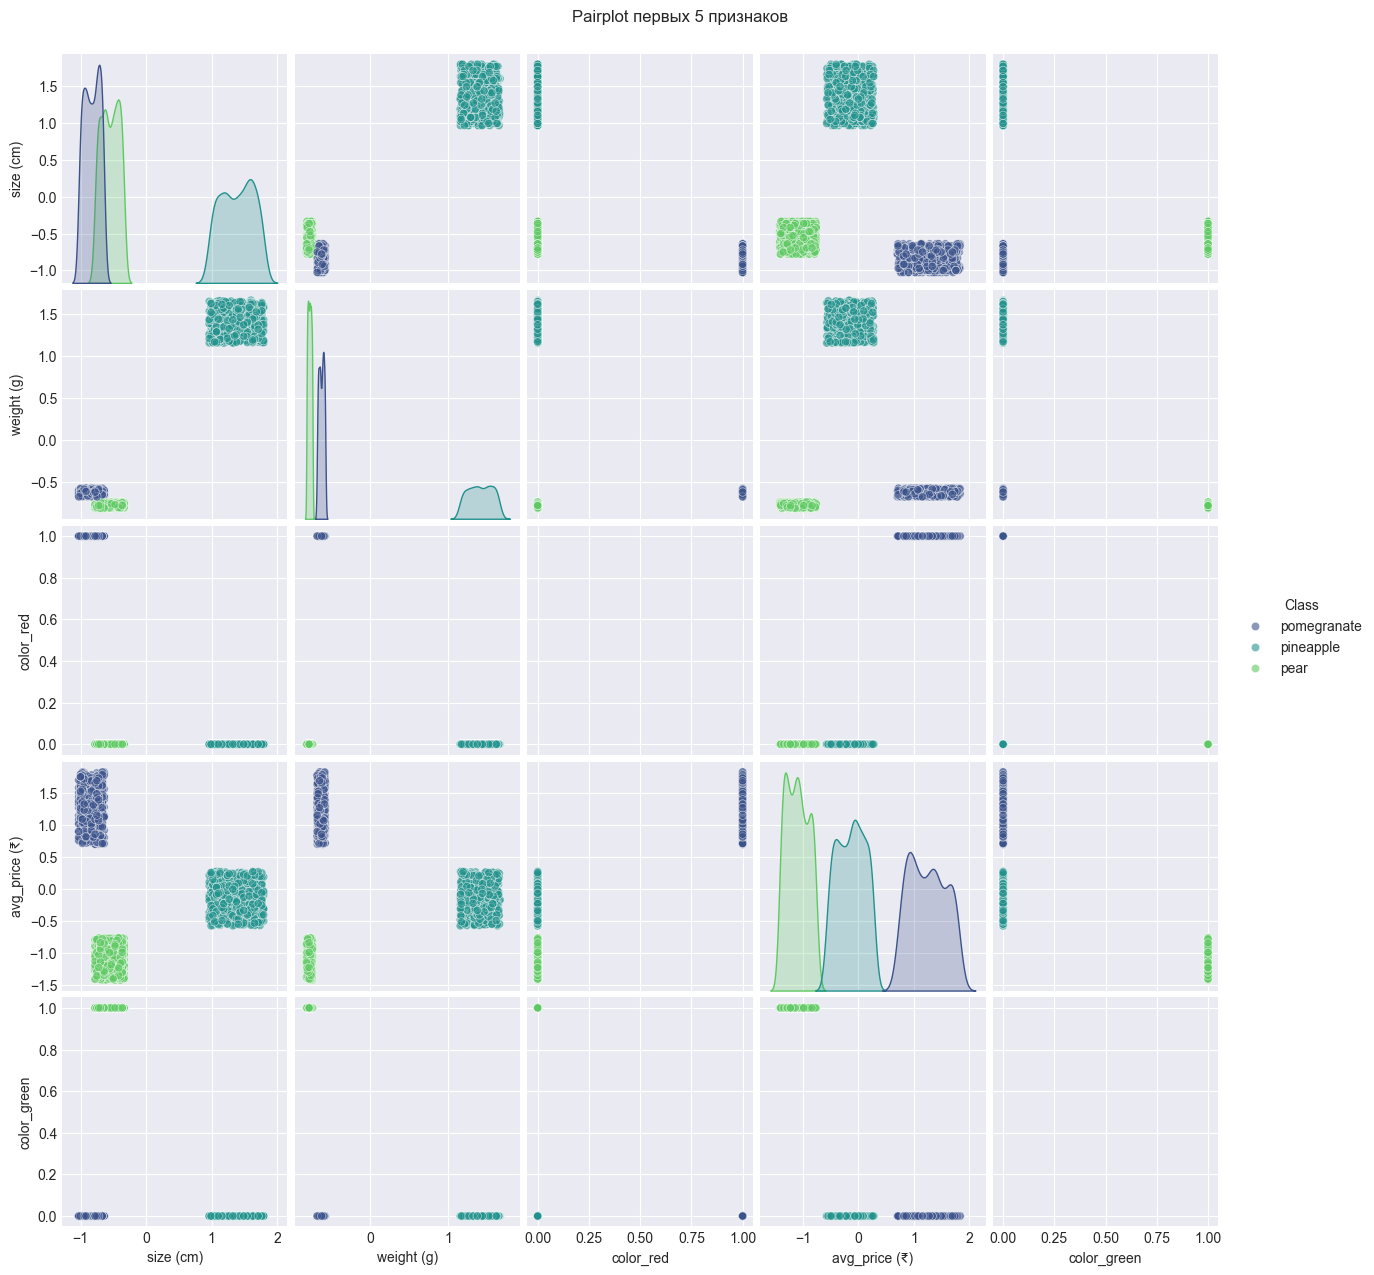


2. Тепловая карта корреляций


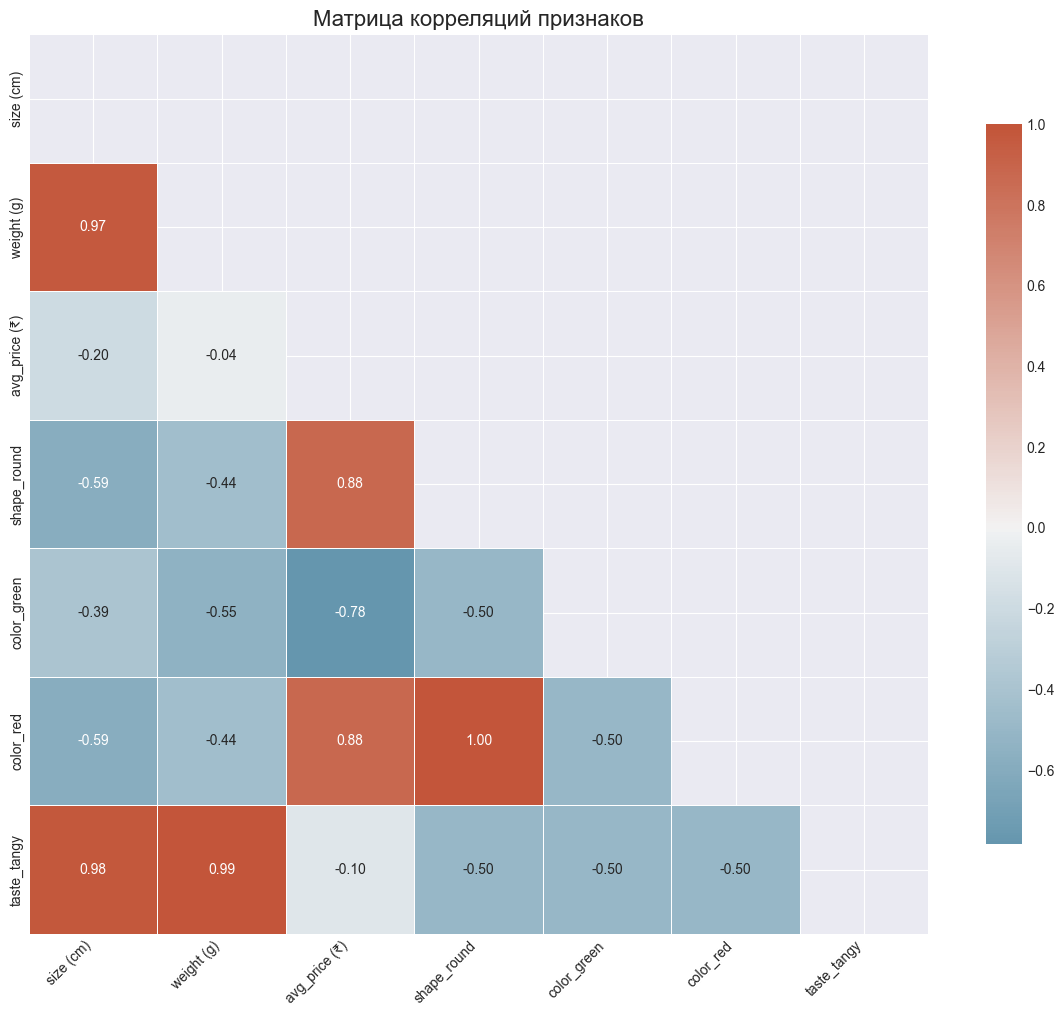


3. Визуализация PCA (2D и 3D)
Объясненная дисперсия: [0.62287082 0.36557121 0.00648306]
Суммарная объясненная дисперсия: 0.995


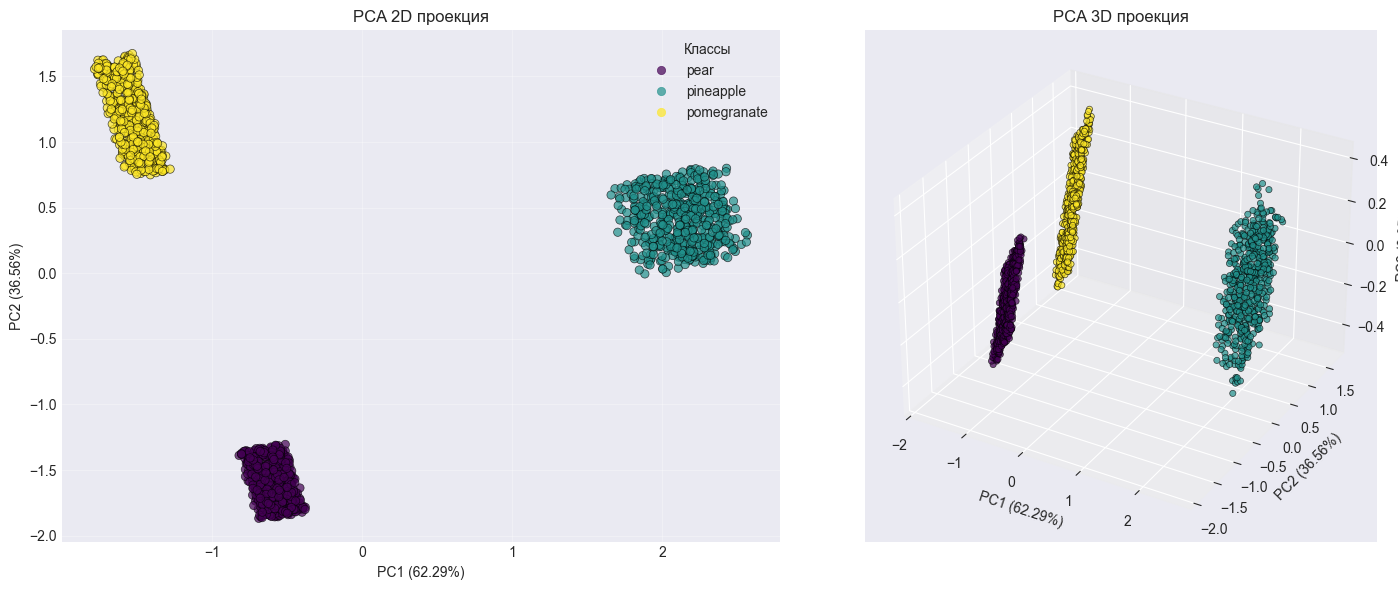

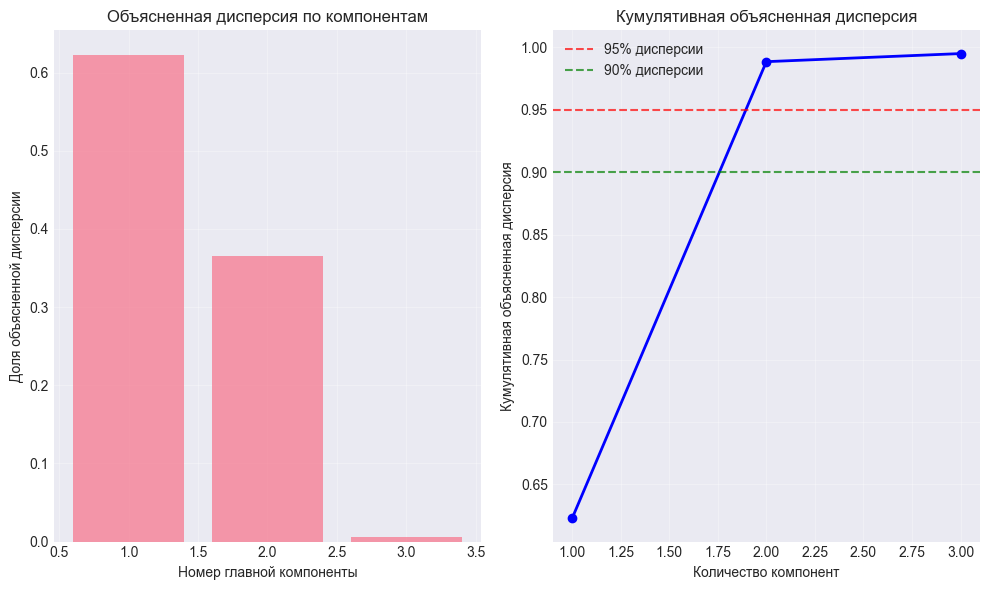


4. Визуализация t-SNE
  Применяем PCA для уменьшения размерности перед t-SNE (7 компонент)...
  Объясненная дисперсия PCA: 1.000
  Вычисляем t-SNE с perplexity=5...
  Вычисляем t-SNE с perplexity=30...
  Вычисляем t-SNE с perplexity=50...


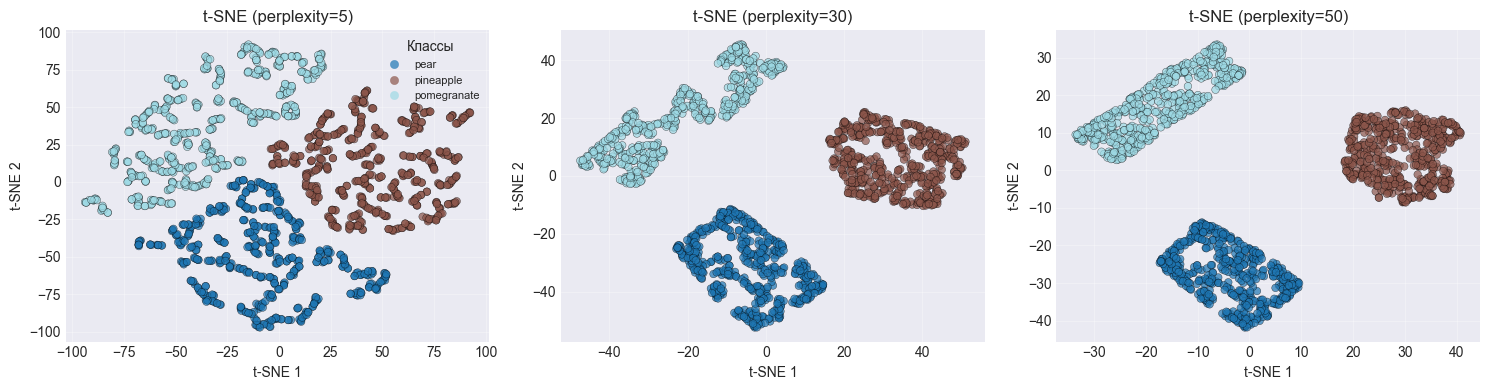


6. Параллельные координаты


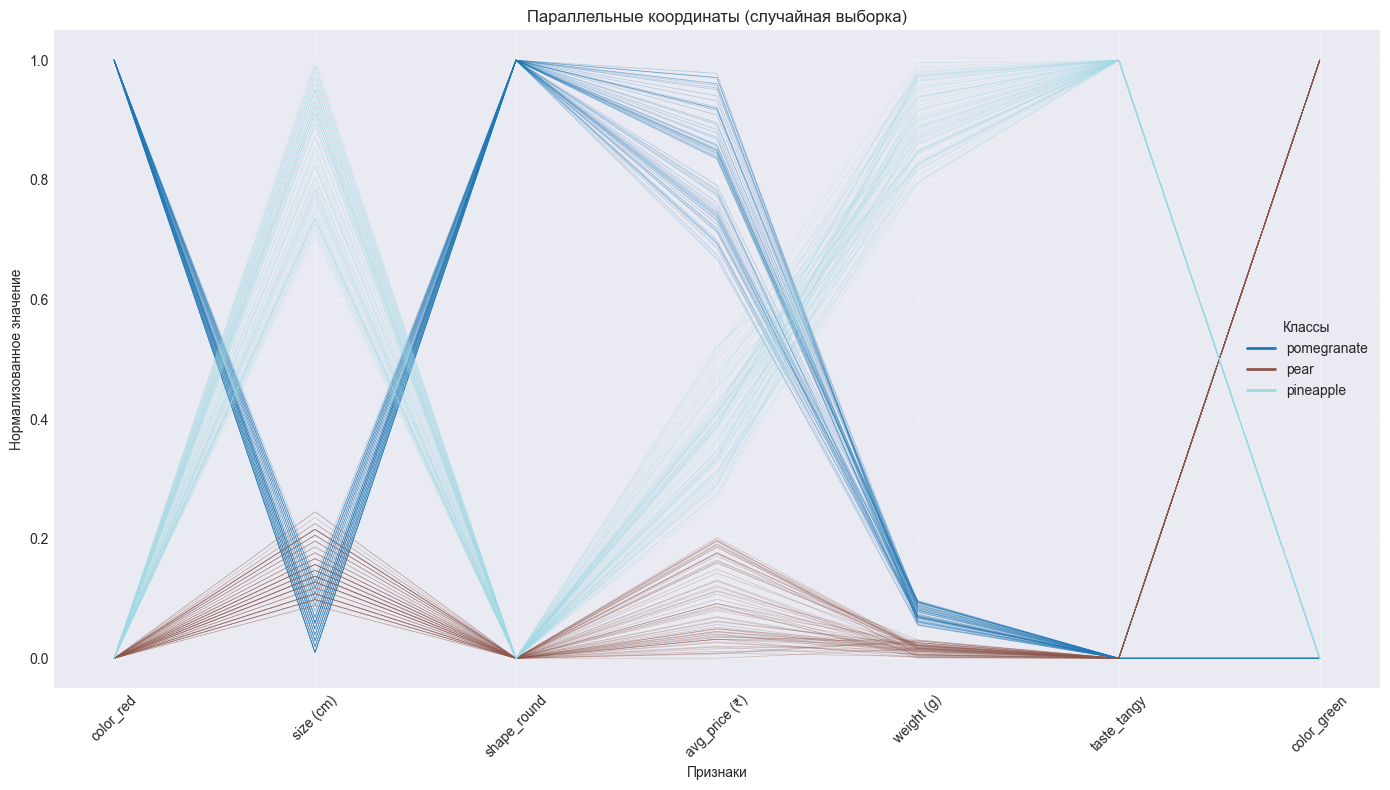


7. Радар-чарты по классам


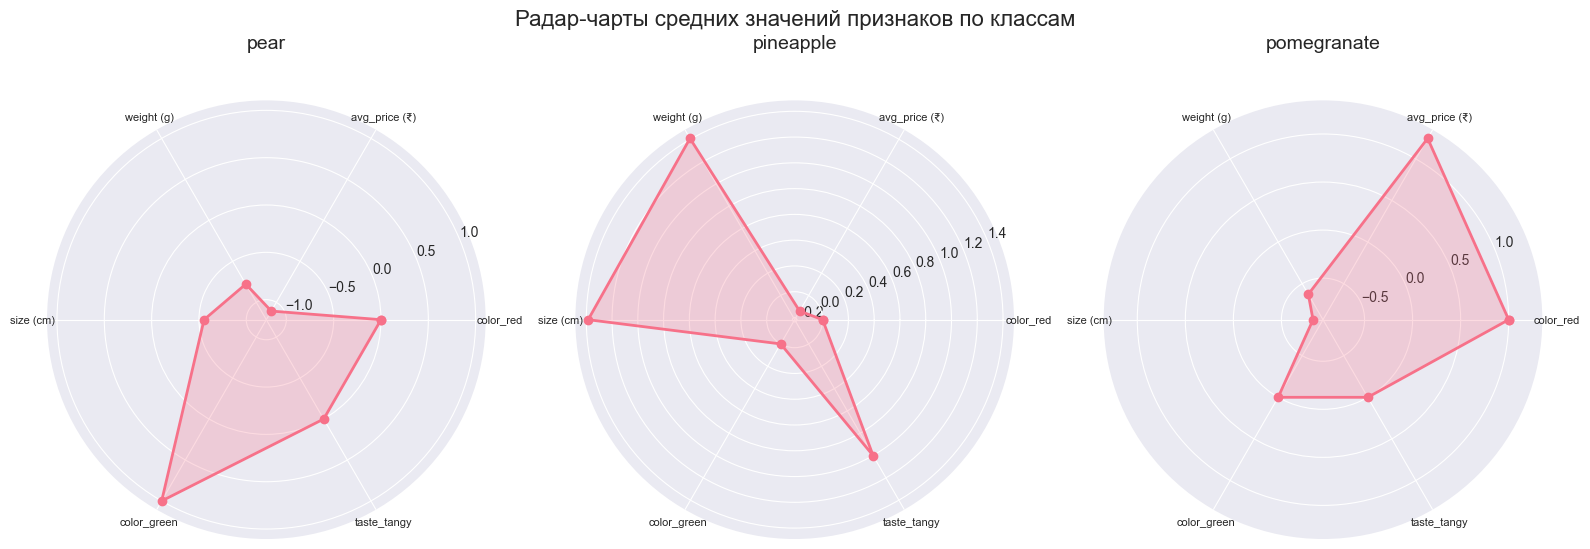


9. Сравнение методов уменьшения размерности
  Применяем PCA...
  Применяем t-SNE...
  Применяем MDS...
  Применяем Isomap...
  Применяем UMAP...


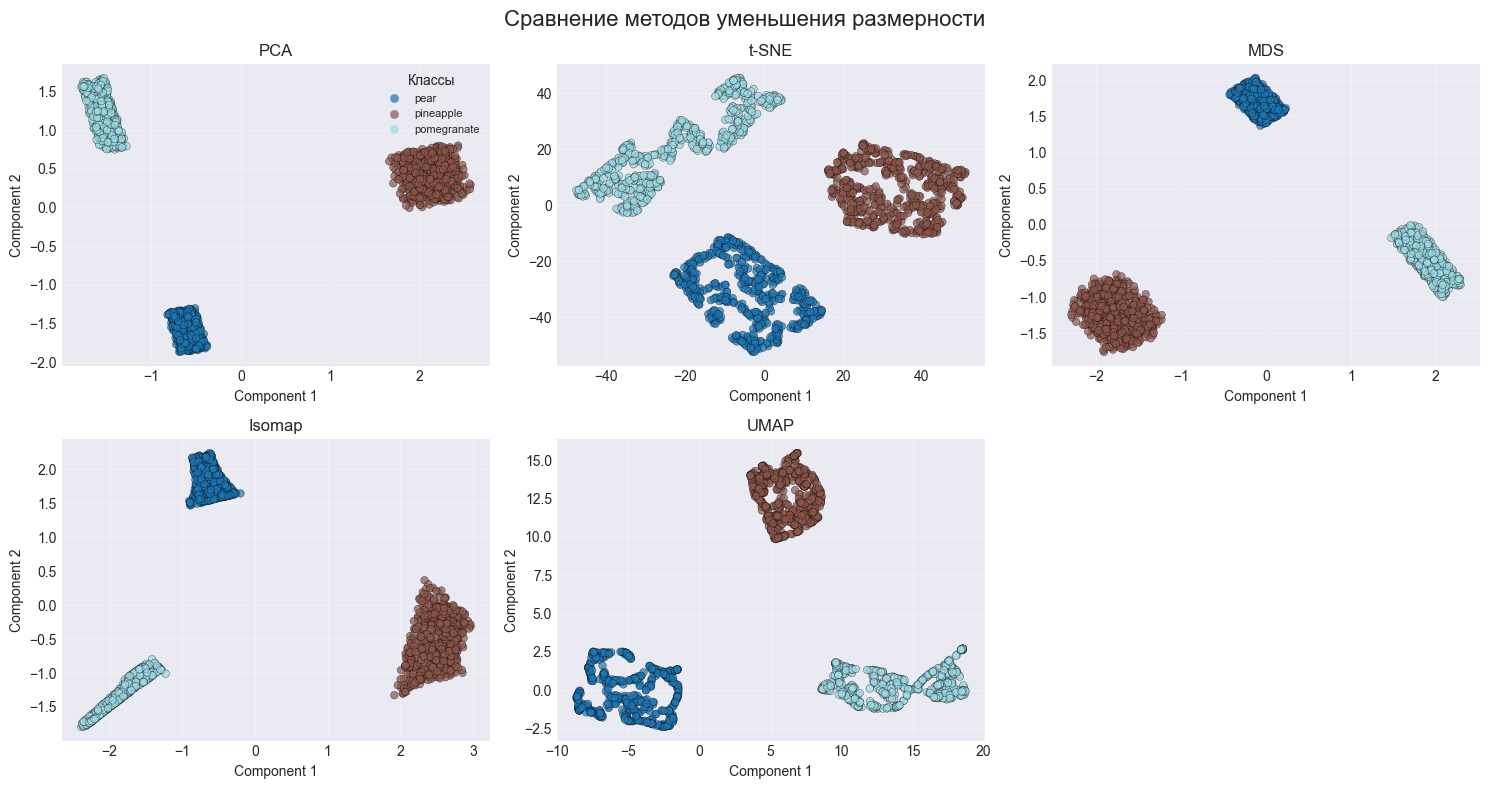


5. Визуализация UMAP


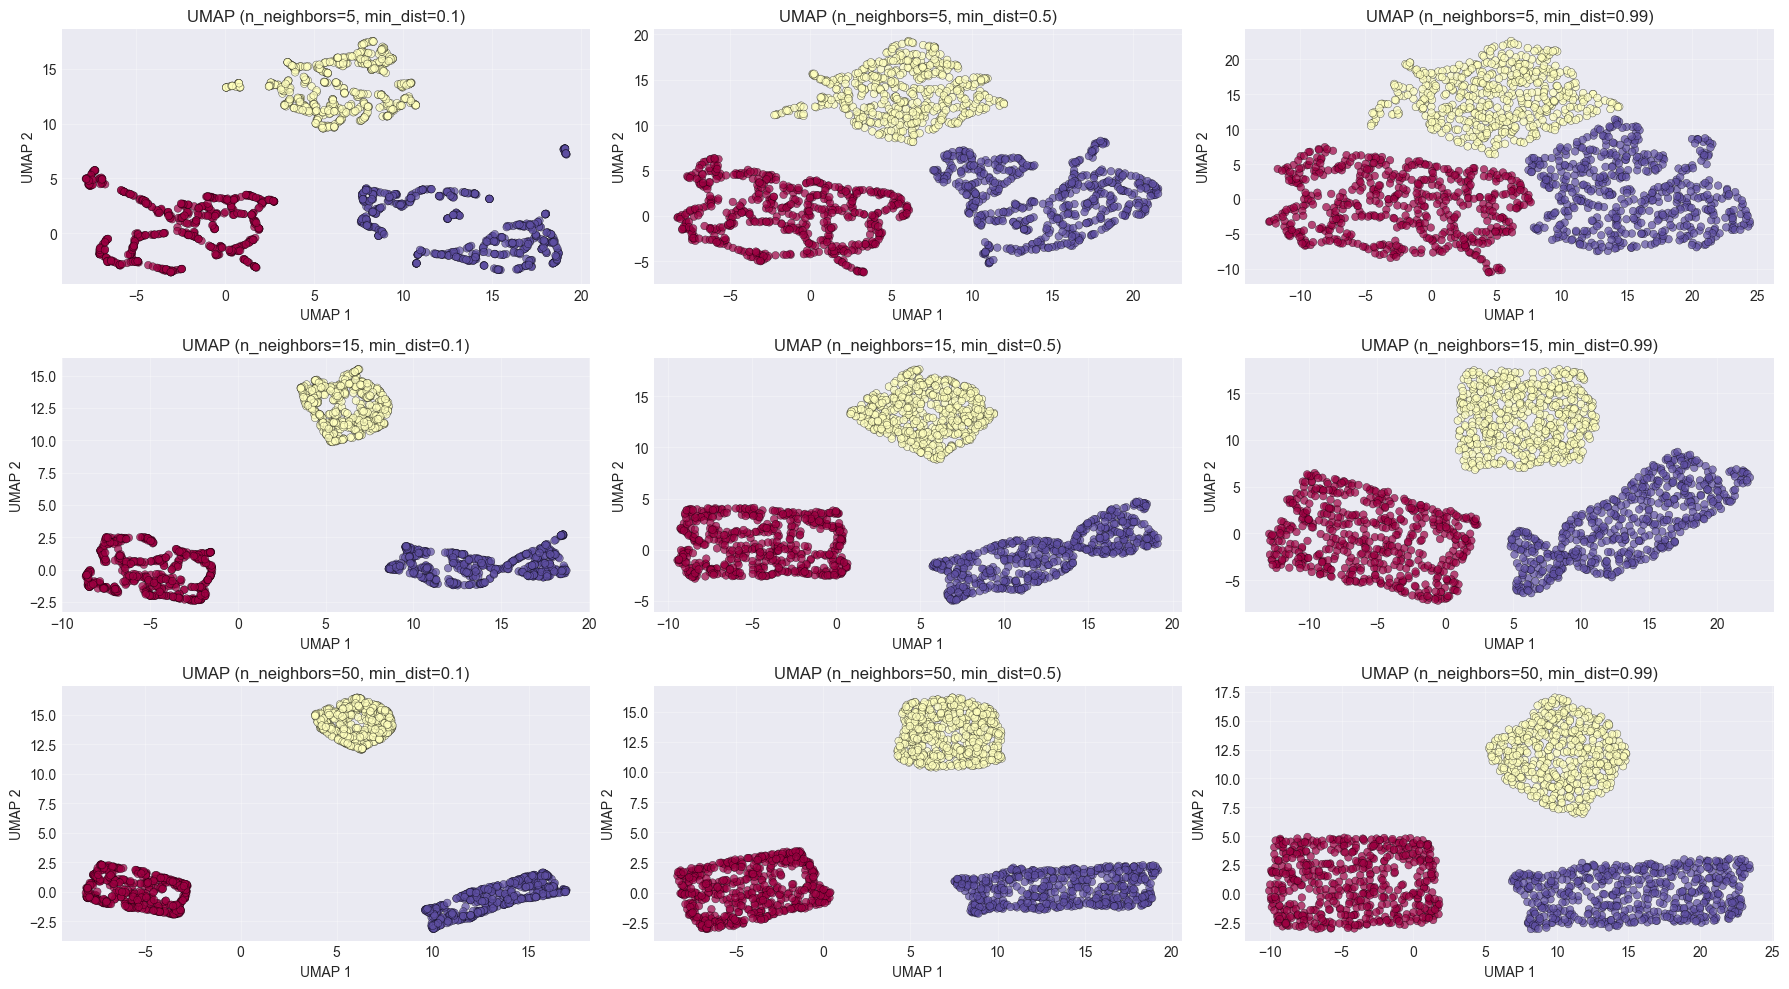


8. Интерактивная 3D визуализация (откроется в браузере)
  График сохранен в файл: interactive_3d_plot.html



ВИЗУАЛИЗАЦИЯ ЗАВЕРШЕНА


In [11]:
 # Инициализация визуализатора
visualizer = HighDimVisualizer(random_state=42)

X, y, feature_names = visualizer.load_dataset()
    
# Базовая информация о данных
print(f"\nИнформация о данных:")
print(f"  Размер: {X.shape}")
print(f"  Количество классов: {len(np.unique(y))}")
print(f"  Количество признаков: {X.shape[1]}")
print(f"  Минимум: {X.min():.3f}, Максимум: {X.max():.3f}")
print(f"  Среднее: {X.mean():.3f}, Стандартное отклонение: {X.std():.3f}")
    
# Запуск визуализации
visualizer.run_full_visualization(X, y, feature_names)